In [1]:
%autosave 2
%matplotlib inline

Autosaving every 2 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
mat = loadmat('ex8data1.mat')

In [6]:
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']

In [7]:
X.shape, Xval.shape, yval.shape

((307, 2), (307, 2), (307, 1))

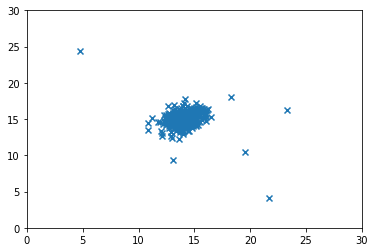

In [15]:
plt.scatter(X[:, 0], X[:, 1], marker='x', alpha=1)
plt.ylim(0, 30)
plt.xlim(0, 30)
plt.show()

In [26]:
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    var = np.var(X, axis=0)
    return mu, var
mu, sigma2 = estimateGaussian(X)
mu, sigma2

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [27]:
def multivariateGaussian(X, mu, sigma2):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p
p = multivariateGaussian(X, mu, sigma2)

In [30]:
def selectThreshold(yval, pval):
    """
    Find the best threshold (epsilon) to use for selecting outliers
    """
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 8.990852779269496e-05
Best F1 on Cross Validation Set: 0.8750000000000001


/home/yash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [33]:
mat2 = loadmat("ex8data2.mat")
X2 = mat2["X"]
Xval2 = mat2["Xval"]
yval2 = mat2["yval"]# compute the mean and variance
mu2, sigma2_2 = estimateGaussian(X2)# Training set
p3 = multivariateGaussian(X2, mu2, sigma2_2)# cross-validation set
pval2 = multivariateGaussian(Xval2, mu2, sigma2_2)# Find the best threshold
epsilon2, F1_2 = selectThreshold(yval2, pval2)
print("Best epsilon found using cross-validation:",epsilon2)
print("Best F1 on Cross Validation Set:",F1_2)
print("# Outliers found:",np.sum(p3<epsilon2))

Best epsilon found using cross-validation: 1.377228890761358e-18
Best F1 on Cross Validation Set: 0.6153846153846154
# Outliers found: 117


/home/yash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
